# Importing Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.fftpack


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Define the function
def exp_decay(x, a, b, c):
  return a * np.exp(-b * x) + c

# Gerando Sinais & removendo Ruídos

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


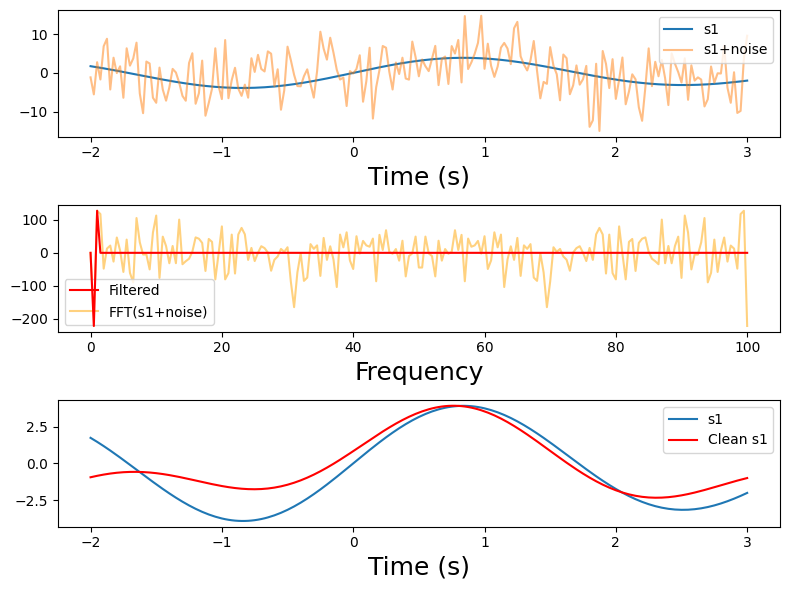

In [ ]:
size = 201

t = np.linspace(-2,3, size)
freqs = np.linspace(0,100,size)

s1 = (np.sin(2*t*np.pi/3) +  np.sin(t*np.pi/2))*2

mu, sigma = 1, 1
z = np.random.normal(mu, sigma, size)*5  # noise
s1noise = s1 - z  # data
s1noise = s1noise - np.mean(s1noise)


sig1fft = np.fft.fft(s1noise)
for i in range(size):
  if freqs[i] > 1:
    sig1fft[i] = 0

s1f = np.fft.ifft(sig1fft)*2

fig, ax = plt.subplots(3,1,figsize=(8,6))

ax[0].plot(t,s1,label='s1')
ax[0].plot(t,s1noise,alpha=0.5, label='s1+noise')
ax[0].set_xlabel('Time (s)',fontsize=18)


ax[1].plot(freqs,sig1fft,c='red', label='Filtered',zorder=99)
ax[1].plot(freqs,np.fft.fft(s1noise),c='orange', alpha=0.5, label='FFT(s1+noise)',zorder=0)
ax[1].set_xlabel('Frequency',fontsize=18)

ax[2].plot(t,s1,label='s1')
ax[2].plot(t,s1f,label='Clean s1', c='red')
ax[2].set_xlabel('Time (s)',fontsize=18)

for i in range(3):
  ax[i].legend()

fig.tight_layout()
plt.show()

# Sinais limpos

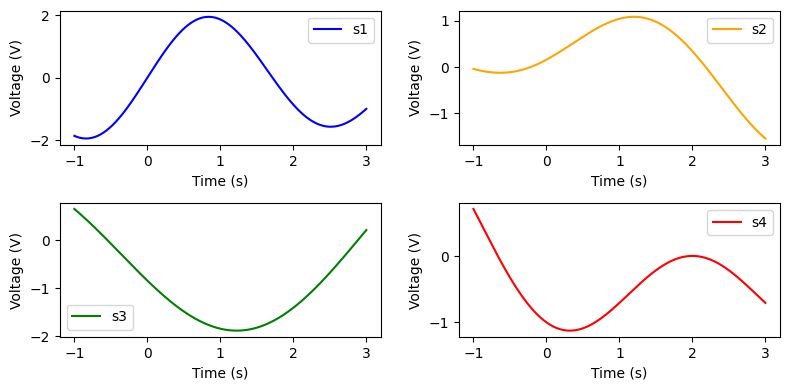

In [ ]:
size = 201

t = np.linspace(-1,3, size)
s1 = (np.sin(2*t*np.pi/3) +  np.sin(t*np.pi/2))
s2 = (np.sin(t*np.pi/2 - 1) +  np.cos(t*np.pi/3))
s3 = -(np.sin(t*np.pi/4 + 1) +  np.sin(t*np.pi/3))
s4 = -(np.sin(t*np.pi/4) +  np.cos(t*np.pi/2))


signals = [s1,s2,s3,s4]


fig, axs = plt.subplots(2,2, figsize=(8,4))
axs[0,0].plot(t,signals[0], label='s1',c='blue')
axs[0,1].plot(t,signals[1], label='s2',c='orange')
axs[1,0].plot(t,signals[2], label='s3',c='green')
axs[1,1].plot(t,signals[3], label='s4', c='red')

for i in range(2):
  for j in range(2):
    axs[i,j].legend()
    axs[i,j].set_xlabel('Time (s)')
    axs[i,j].set_ylabel('Voltage (V)')

fig.tight_layout()
plt.show()

# Sawtooth

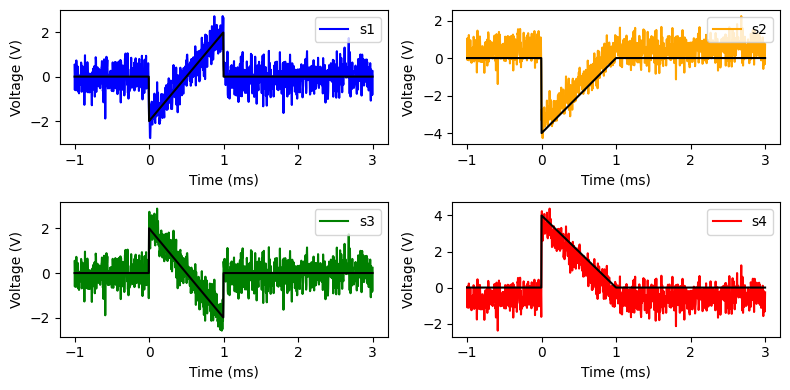

In [ ]:
size = 1001

t = np.linspace(-1,3, size)
s1 = (sg.sawtooth(2*np.pi*t)*2)
s2 = (sg.sawtooth(2*np.pi*t/2)*4)
s3 = -(sg.sawtooth(2*np.pi*t)*2)
s4 = -(sg.sawtooth(2*np.pi*t/2)*4)

t_i = find_nearest(t, value=0)
t_f = find_nearest(t, value=1)

s1[:t_i] = 0
s1[t_f:] = 0

s2[:t_i] = 0
s2[t_f:] = 0

s3[:t_i] = 0
s3[t_f:] = 0

s4[:t_i] = 0
s4[t_f:] = 0


signals_og = [s1,s2,s3,s4]

mu, sigma = 1, 1
z = np.random.normal(mu, sigma, size)*0.5 # noise
s1noise = s1 - z  # data
s1noise = s1noise - np.mean(s1noise)

s2noise = s2 - z  # data
s2noise = s2noise - np.mean(s2noise)

s3noise = s3 - z  # data
s3noise = s3noise - np.mean(s3noise)

s4noise = s4 - z  # data
s4noise = s4noise - np.mean(s4noise)

signals_noise = [s1noise,s2noise,s3noise,s4noise]


fig, axs = plt.subplots(2,2, figsize=(8,4))
axs[0,0].plot(t,signals_noise[0], label='s1',c='blue')
axs[0,0].plot(t,signals_og[0],c='black')

axs[0,1].plot(t,signals_noise[1], label='s2',c='orange')
axs[0,1].plot(t,signals_og[1],c='black')

axs[1,0].plot(t,signals_noise[2], label='s3',c='green')
axs[1,0].plot(t,signals_og[2],c='black')

axs[1,1].plot(t,signals_noise[3], label='s4', c='red')
axs[1,1].plot(t,signals_og[3],c='black')

for i in range(2):
  for j in range(2):
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_xlabel('Time (ms)')
    axs[i,j].set_ylabel('Voltage (V)')


fig.tight_layout()
plt.show()

# Limpando Sinais

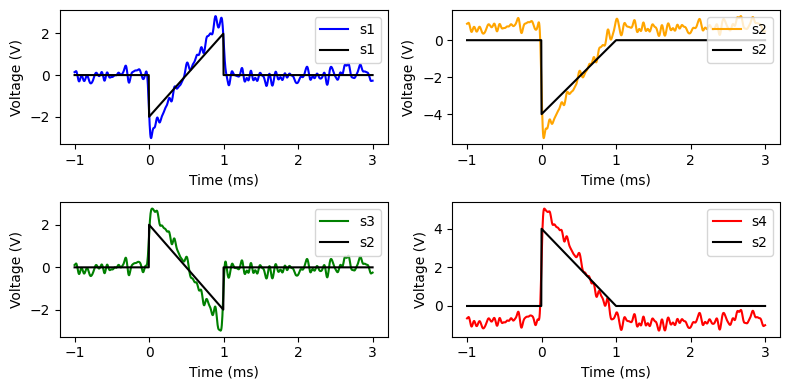

In [ ]:


# ------ FFT ----- #
# sig1fft = np.fft.fft(s1noise)
s1fft = scipy.fftpack.fft(s1noise)
s2fft = scipy.fftpack.fft(s2noise)
s3fft = scipy.fftpack.fft(s3noise)
s4fft = scipy.fftpack.fft(s4noise)

n = len(t)
odd = n//3
even = n//2

timestep = t[-1] - t[-2]
freq = scipy.fft.fftfreq(n, d=timestep)[:odd]

# Define the parameters
a = np.max(3.0/n * np.abs(s1fft))
b = 0.2
c = 0.01
tf = np.linspace(0, freq[-1], size)
filter = exp_decay(tf, a, b, c)

# tf = np.linspace(0.0, int(t[-1]/(2.0*timestep)),int(n/3))
tf = np.linspace(t[0], t[-1], int(n/3))

# ------ Cleaning freqs ----- #
# s1fft = np.where(3/n * np.abs(s1fft) > filter, 0, s1fft)
# s2fft = np.where(3/n *np.abs(s2fft) > filter, 0, s2fft)
# s3fft = np.where(3/n *np.abs(s3fft) > filter, 0, s3fft)
# s4fft = np.where(3/n *np.abs(s4fft) > filter, 0, s4fft)

cap = find_nearest(freq, 20)
s1fft[cap:] = 0.0
s2fft[cap:] = 0.0
s3fft[cap:] = 0.0
s4fft[cap:] = 0.0

# ------- iFFT ------ #96
4096
s1f = scipy.fftpack.ifft(s1fft[:odd])
s2f = scipy.fftpack.ifft(s2fft[:odd])
s3f = scipy.fftpack.ifft(s3fft[:odd])
s4f = scipy.fftpack.ifft(s4fft[:odd])

s1f = sg.resample(s1f,size)
s2f = sg.resample(s2f,size)
s3f = sg.resample(s3f,size)
s4f = sg.resample(s4f,size)

s1f =  sg.savgol_filter(s1f, 11, 1)
s2f =  sg.savgol_filter(s2f, 11, 1)
s3f =  sg.savgol_filter(s3f, 11, 1)
s4f =  sg.savgol_filter(s4f, 11, 1)


sig_clean = np.array([s1f,s2f,s3f,s4f])

# ========== filters post-FFT ========== #

# for i in range(len(sig_clean)):
#   # b,a = sg.butter(5, 0.9, 'lowpass')
#   # sig_clean[i] = sg.lfilter(b, a, sig_clean[i])
#   sig_clean[i] = sg.savgol_filter(s1f_rs, 51, 5)
#   sig_clean[i] = median_filter(sig_clean[i],10)


#========================================#
tf=t
fig, axs = plt.subplots(2,2, figsize=(8,4))
axs[0,0].plot(tf,sig_clean[0], label='s1',c='blue')
axs[0,0].plot(t,signals_og[0], label='s1',c='black')

axs[0,1].plot(tf,sig_clean[1], label='s2',c='orange')
axs[0,1].plot(t,signals_og[1], label='s2',c='black')

axs[1,0].plot(tf,sig_clean[2], label='s3',c='green')
axs[1,0].plot(t,signals_og[2], label='s2',c='black')

axs[1,1].plot(tf,sig_clean[3], label='s4', c='red')
axs[1,1].plot(t,signals_og[3], label='s2',c='black')

for i in range(2):
  for j in range(2):
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_xlabel('Time (ms)')
    axs[i,j].set_ylabel('Voltage (V)')


fig.tight_layout()
plt.show()

# Corrente de Plasma - Rogowski



250
500
1.984


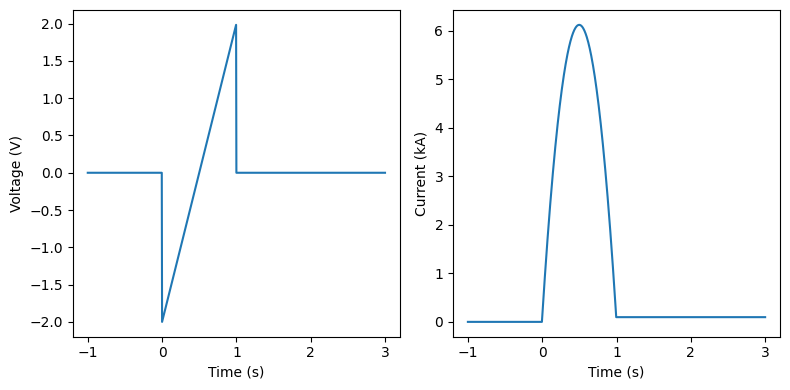

In [ ]:
n=6400          # Densidade de voltas da sonda em m^-1
A = 2.56        # Área efetiva da sonda em m^2
mu0 = 12.566e-7 # permeabildiade magnética

sr = (sg.sawtooth(np.pi*t*2)*2)

idx_i = find_nearest(t, value = 0.000)
print(idx_i)

idx_f = find_nearest(t, value = 1.000)
print(idx_f)

sr[:idx_i] = 0
sr[idx_f:] = 0

sIr = -np.cumsum(sr)/(n*A*mu0)

print(sr[idx_f-1])

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].plot(t,sr)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (V)')

axs[1].plot(t, sIr/1e3)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Current (kA)')

fig.tight_layout()
plt.show()

# Constante C

374
-12338.770144443788


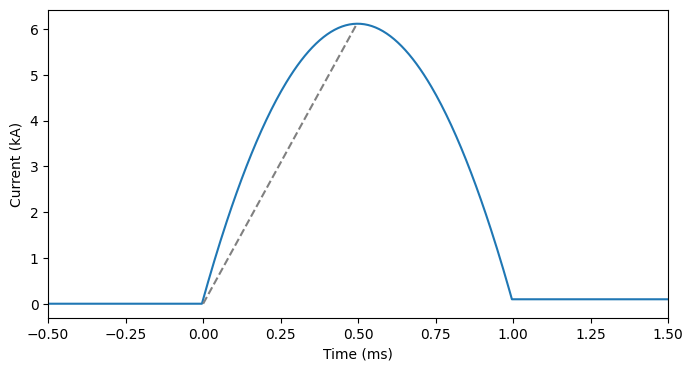

In [ ]:
sIr = np.abs(sIr)

max_idx = np.where(sIr == np.max(sIr))[0][0]
max_idx = find_nearest(sIr, value=np.max(sIr))
print(max_idx)

C = -(np.max(sIr)/(t[max_idx] - t[idx_i]))

print(C)

fig, axs = plt.subplots(figsize=(8,4))
axs.plot(t, sIr/1e3)
axs.plot([t[idx_i],t[max_idx]],[0,np.max(sIr/1e3)],'--',c='gray')

axs.set_xlabel('Time (ms)')
axs.set_ylabel('Current (kA)')

axs.set_xlim(-0.5,1.5)

plt.show()

# Validade do Modelo

In [ ]:
print(s1f.size)
s1_cut = s1f[idx_i:max_idx]
s2_cut = s2f[idx_i:max_idx]
s3_cut = s3f[idx_i:max_idx]
s4_cut = s4f[idx_i:max_idx]

t_cut = t[idx_i:max_idx]

# s1_cut = signals_noise[0][idx_i:max_idx]
# s2_cut = signals_noise[1][idx_i:max_idx]
# s3_cut = signals_noise[2][idx_i:max_idx]
# s4_cut = signals_noise[3][idx_i:max_idx]

# s1_cut = signals_og[0][idx_i:max_idx]
# s2_cut = signals_og[1][idx_i:max_idx]
# s3_cut = signals_og[2][idx_i:max_idx]
# s4_cut = signals_og[3][idx_i:max_idx]

print(s1_cut.size)
print(s2_cut.size)
print(s3_cut.size)
print(s4_cut.size)

1001
124
124
124
124


# Deslocamento

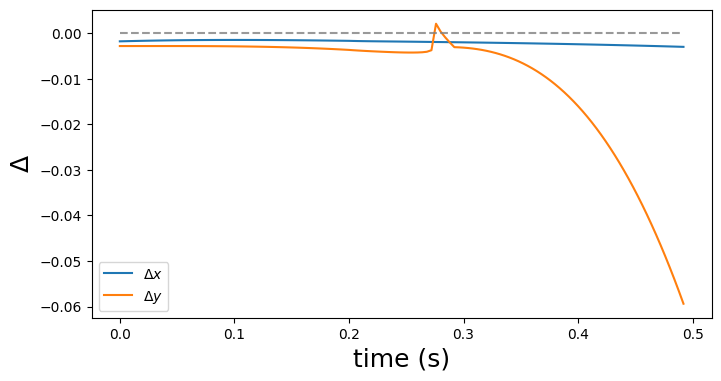

In [ ]:
n=6400          # Densidade de voltas da sonda em m^-1
A = 2.56        # Área efetiva da sonda em m^2
mu0 = 12.566e-7 # permeabildiade magnética
mu0 = 1.25663706212e-6

K = -(3.52e-11) * C
# K = 0.94
r0 = 0.0165      # raio em metros

K = (-r0**2 * n * mu0 * C)/2

R = 0.15

# Deslocamento em y
deltaY = (s3_cut-s1_cut)/((4*s1_cut*s3_cut)/K - (s1_cut+s3_cut)/R)
# Deslocamento em x
deltaX = (s2_cut-s4_cut)/((s2_cut+s4_cut)/R - (4*s2_cut*s4_cut)/K)

deltaY = np.zeros(len(s1_cut))
deltaX = np.zeros(len(s1_cut))
for i in range(len(s1_cut)):
  if s3_cut[i] != 0 and s1_cut[i] != 0:
    deltaY[i] = (s3_cut[i]-s1_cut[i])/((4*s1_cut[i]*s3_cut[i])/K - (s1_cut[i]+s3_cut[i])/R)
  else:
    deltaY[i] = R

  if s2_cut[i] != 0 and s4_cut[i] != 0:
    deltaX[i] = (s2_cut[i]-s4_cut[i])/((s2_cut[i]+s4_cut[i])/R - (4*s2_cut[i]*s4_cut[i])/K)
  else:
    deltaX[i] = R



deltaX =  sg.savgol_filter(deltaX, 101, 3)
deltaY =  sg.savgol_filter(deltaY, 101, 3)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(t_cut,deltaX, label=r'$\Delta x$')
plt.plot(t_cut,deltaY, label=r'$\Delta y$')
# plt.ylim(-10,2)

plt.plot([0,t_cut[-1]],[0,0],'--',c='gray',alpha=0.8)

plt.xlabel('time (s)', fontsize=18)
plt.ylabel(r'$\Delta$', fontsize=18)

plt.legend()
plt.show()

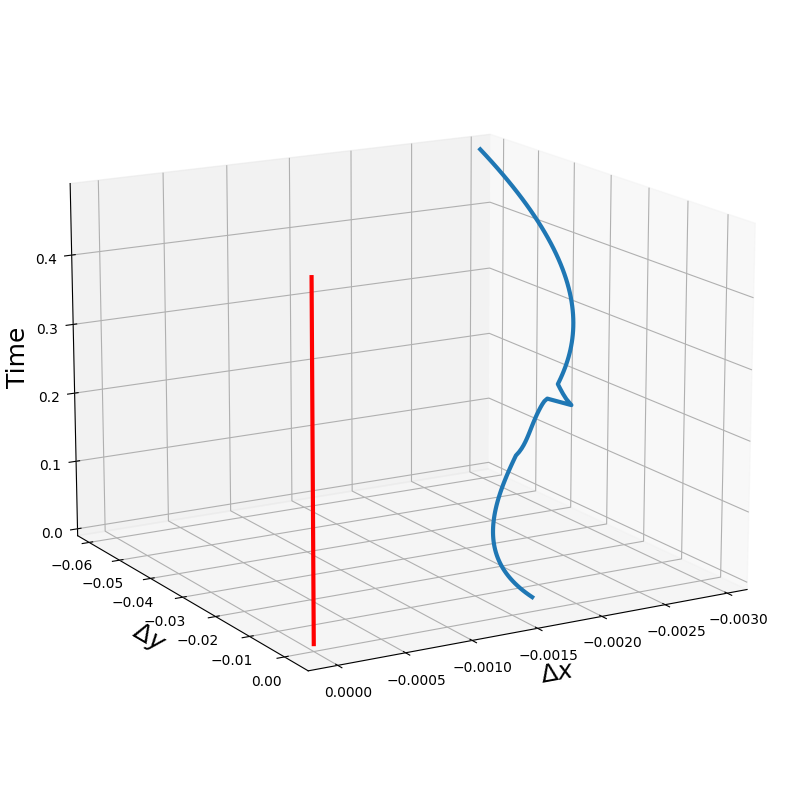

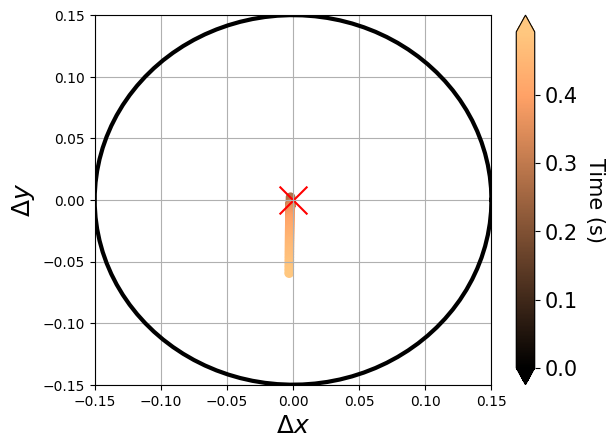

In [ ]:
import matplotlib as mpl

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=60, roll=0)

ax.plot3D(deltaX,deltaY,t_cut,lw=3)
ax.set_xlabel(r'$\Delta x$',fontsize=18)
ax.set_ylabel(r'$\Delta y$',fontsize=18)
ax.set_zlabel('Time', rotation=90, fontsize=18)

ax.plot([0,0],[0,0],[0,t_cut[-1]],c='r',lw=3)

fig.tight_layout()
plt.show()
#===================================================#
colors = np.linspace(t_cut[0], t_cut[-1], len(t_cut))
plt.scatter(deltaX,deltaY, c=colors, cmap=mpl.colormaps['copper'])


cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.1f")

plt.scatter(0,0,marker='x',c='r',s=20**2)
cbar.set_label(label="Time (s)", size=15, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=15)

plt.xlabel(r'$\Delta x$', fontsize=18)
plt.ylabel(r'$\Delta y$', fontsize=18)

plt.xlim(-R,R)
plt.ylim(-R,R)

theta = np.linspace(0, 2*np.pi, 100)
x = R * np.cos(theta)
y = R * np.sin(theta)
plt.plot(x,y,c='k',lw=3)

plt.grid()
plt.show()

# FFT in Sawtooth Signals

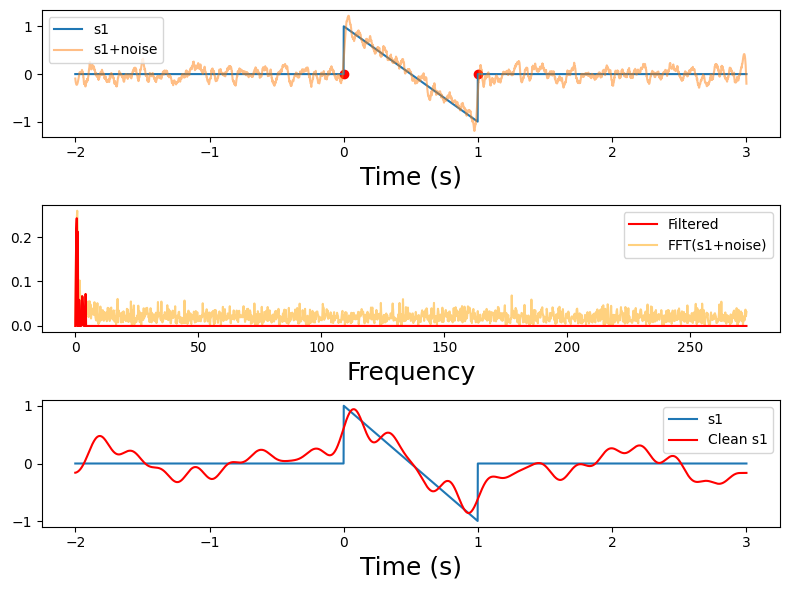

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.fftpack
from scipy.ndimage import median_filter

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Define the function
def exp_decay(x, a, b, c):
  return a * np.exp(-b * x) + c


size = 4096

t = np.linspace(-2,3, size)
freqs = np.linspace(0,100,size)

s1 = -(sg.sawtooth(2*np.pi*t))

t_i = np.where(t == 0)[0][0]
s1[:t_i] = 0

t_f = np.where(s1 == np.min(s1))[0][0]
s1[t_f:] = 0

mu, sigma = 1, 1
z = np.random.normal(mu, sigma, size)*0.5 # noise
s1noise = s1 - z  # data
s1noise = s1noise - np.mean(s1noise)

#====== TESTING FILTERS ======#

sav =  sg.savgol_filter(s1noise, 51, 3)
median = median_filter(sav,3)

b,a = sg.butter(1, 0.1, 'lowpass')
lfit = sg.lfilter(b, a, s1noise)

def find_window(array,threshold):
  array = array.copy()

  change_idx = np.array([])
  for i in range(len(array)-1):
    delta = np.abs(array[i+1] - array[i])

    if delta > threshold:
      change_idx = np.append(change_idx, i)
  return change_idx

test = find_window(s1noise,1)

# peaks=sg.find_peaks(np.abs(sav),height=[1.7, 3])[0]
# plt.plot(np.linspace(-2,3,len(peaks)),peaks)
#=============================#


# ------ FFT ----- #
# sig1fft = np.fft.fft(s1noise)
yf = scipy.fftpack.fft(s1noise)
yf_filtered = yf.copy()


n = len(t)
odd = n//3
even = n//2

timestep = t[-1] - t[-2]
freq = scipy.fft.fftfreq(n, d=timestep)[:odd]

# Define the parameters
a = np.max(3.0/n * np.abs(yf))
b = 0.4
c = 0.01
filter = exp_decay(freq, a, b, c)

xf = np.linspace(0.0, int(t[-1]/(2.0*timestep)),int(n/2))
tf = np.linspace(t[0], t[-1], int(n/2))

# ------ Cleaning freqs ----- #
for i in range(len(freq)):
  if yf[i] > filter[i] :
    yf_filtered[i] = 0.0

cap = find_nearest(freq, 5)
yf_filtered[cap:] = 0.0

# ------- iFFT ------ #
s1f = np.fft.ifft(yf_filtered)
s1f = scipy.fftpack.ifft(yf_filtered[:odd])

s1f_rs = sg.resample(s1f,size)


# ======== filters post-FFT ======== #
sav2 =  sg.savgol_filter(s1f_rs, 51, 5)
median = median_filter(sav2,10)

b,a = sg.butter(15, 0.9, 'lowpass')
lfit = sg.lfilter(b, a, s1f_rs)

# ======= SAWTOOTH APPROX =========== #
sw = np.zeros(size)
sw += np.sin(t)
N = 100
flag = 1
for i in range(1, 4):
  sw += flag*(1/i)*np.sin(i*t)
  flag = -1*flag

# ======= PLOTTING ======== #
fig, ax = plt.subplots(3,1,figsize=(8,6))

ax[0].plot(t,s1,label='s1')
ax[0].plot(t,sav,alpha=0.5, label='s1+noise')
ax[0].scatter([t[1637],t[2456]], [s1[1637],s1[2456]], c='r')
ax[0].set_xlabel('Time (s)',fontsize=18)

ax[1].plot(freq,3.0/n * np.abs(yf_filtered[:odd]),c='red', label='Filtered',zorder=99)
ax[1].plot(freq,3.0/n * np.abs(yf[:odd]),c='orange', alpha=0.5, label='FFT(s1+noise)',zorder=0)
ax[1].set_xlabel('Frequency',fontsize=18)

ax[2].plot(t,s1,label='s1')
ax[2].plot(t,median,label='Clean s1', c='red')
ax[2].set_xlabel('Time (s)',fontsize=18)

for i in range(3):
  ax[i].legend()

fig.tight_layout()
plt.show()

# ================ TEST ================

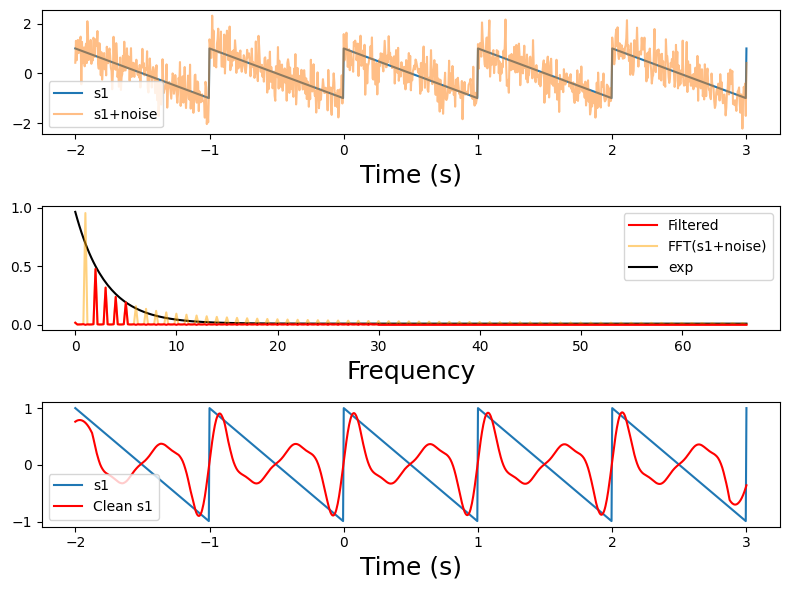

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.fftpack
from scipy.ndimage import median_filter

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Define the function
def exp_decay(x, a, b, c):
  return a * np.exp(-b * x) + c

size = 1001

t = np.linspace(-2,3, size)

s1 = -(sg.sawtooth(2*np.pi*t))

# t_i = np.where(t == 0)[0][0]
# s1[:t_i] = 0

# t_f = np.where(np.isclose(s1, np.min(s1)))[0][0]
# s1[t_f:] = 0

mu, sigma = 1, 1
z = np.random.normal(mu, sigma, size)*0.5 # noise
s1noise = s1 - z  # data
s1noise = s1noise - np.mean(s1noise)

#====== TESTING FILTERS ======#

sav =  sg.savgol_filter(s1noise, 51, 3)
median = median_filter(sav,3)

b,a = sg.butter(1, 0.1, 'lowpass')
lfit = sg.lfilter(b, a, s1noise)

def find_window(array,threshold):
  array = array.copy()

  change_idx = np.array([])
  for i in range(len(array)-1):
    delta = np.abs(array[i+1] - array[i])

    if delta > threshold:
      change_idx = np.append(change_idx, i)
  return change_idx

test = find_window(s1noise,1)

# peaks=sg.find_peaks(np.abs(sav),height=[1.7, 3])[0]
# plt.plot(np.linspace(-2,3,len(peaks)),peaks)
#=============================#


# ------------------ FFT ----------------- #
# sig1fft = np.fft.fft(s1noise)
yf = scipy.fftpack.fft(s1)
yf_filtered = yf.copy()
# yf =  sg.savgol_filter(yfft, 50, 5)

n = len(t)
odd = n//3
even = n//2
timestep = t[-1] - t[-2]
freq = scipy.fft.fftfreq(n, d=timestep)[:odd]

# Define the parameters
a = np.max(3.0/n * np.abs(yf))
b = 1
c = 0.01

tf = np.linspace(0, freq[-1], size)
filter = exp_decay(tf, a, b, c)

xf = np.linspace(0.0, int(t[-1]/(2.0*timestep)),int(n/2))
tf = np.linspace(t[0], t[-1], int(n/2))

# ------ Cleaning freqs ----- #
for i in range(len(yf)):
  if 3.0/n * np.abs(yf[i]) > filter[i]:
    yf_filtered[i] = 0.0

cap = find_nearest(freq, 30)
yf_filtered[cap:] = 0.0

# ------- iFFT ------ #
s1f = np.fft.ifft(yf_filtered)
s1f = scipy.fftpack.ifft(yf_filtered[:odd])

s1f_rs = sg.resample(s1f,size)


# ======== filters post-FFT ======== #
sav2 =  sg.savgol_filter(s1f_rs, 51, 2)
median = median_filter(sav2,5)

b,a = sg.butter(15, 0.9, 'lowpass')
lfit = sg.lfilter(b, a, s1f_rs)

# ======= SAWTOOTH APPROX =========== #
sw = np.zeros(size)
sw += np.sin(t)
N = 100
flag = 1
for i in range(1, 4):
  sw += flag*(1/i)*np.sin(i*t)
  flag = -1*flag

# ======= PLOTTING ======== #
fig, ax = plt.subplots(3,1,figsize=(8,6))

ax[0].plot(t,s1,label='s1')
ax[0].plot(t,s1noise,alpha=0.5, label='s1+noise')
ax[0].set_xlabel('Time (s)',fontsize=18)

ax[1].plot(freq,3.0/n * np.abs(yf_filtered[:odd]),c='red', label='Filtered',zorder=99)
ax[1].plot(freq,3.0/n * np.abs(yf[:odd]),c='orange', alpha=0.5, label='FFT(s1+noise)',zorder=1)


ax[1].plot(freq, filter[:odd],c='black', alpha=1, label='exp',zorder=0)
ax[1].set_xlabel('Frequency',fontsize=18)

ax[2].plot(t,s1,label='s1')
ax[2].plot(t,sav2,label='Clean s1', c='red')
ax[2].set_xlabel('Time (s)',fontsize=18)

for i in range(3):
  ax[i].legend()

fig.tight_layout()
plt.show()

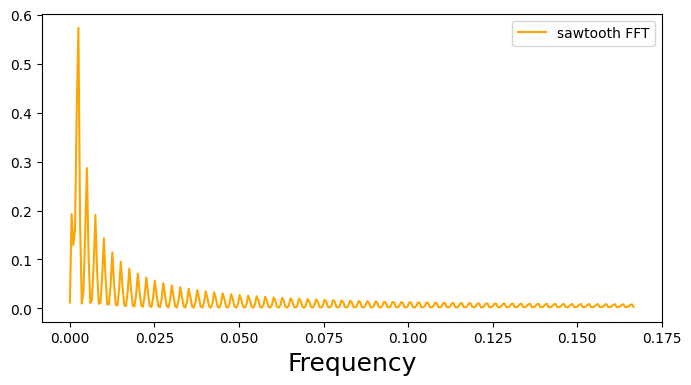

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size = 1001

t = np.linspace(-2,3, size)

s1 = -(sg.sawtooth(2*np.pi*t))

t_i = np.where(t == 0)[0][0]
s1[:t_i] = 0

t_f = np.where(s1 == np.min(s1))[0][0]
s1[t_f:] = 0

mu, sigma = 1, 1
z = np.random.normal(mu, sigma, size)*0.5 # noise
s1noise = s1 - z  # data
s1noise = s1noise - np.mean(s1noise)

#====== TESTING FILTERS ======#

sav =  sg.savgol_filter(s1noise, 51, 3)
median = median_filter(sav,3)

b,a = sg.butter(1, 0.1, 'lowpass')
lfit = sg.lfilter(b, a, s1noise)

def find_window(array,threshold):
  array = array.copy()

  change_idx = np.array([])
  for i in range(len(array)-1):
    delta = np.abs(array[i+1] - array[i])

    if delta > threshold:
      change_idx = np.append(change_idx, i)
  return change_idx

test = find_window(s1noise,1)

# peaks=sg.find_peaks(np.abs(sav),height=[1.7, 3])[0]
# plt.plot(np.linspace(-2,3,len(peaks)),peaks)
#=============================#


# ------------------ FFT ----------------- #
# sig1fft = np.fft.fft(s1noise)
yf = scipy.fftpack.fft(s1)
yf_filtered = yf.copy()
# yf =  sg.savgol_filter(yfft, 50, 5)

n = len(t)
odd = n//3
even = n//2
timestep = t[-1] - t[-2]
freq = scipy.fft.fftfreq(n, d=timestep)[:odd]
xf = np.linspace(0.0, 1.0 / (2.0*t[-1]), n//3)
# Define the function
def exp_decay(x, a, b, c):
  return a * np.exp(-b * x) + c
  # return -a * np.sqrt(b*x) + c


# Define the parameters
a = np.max(3.0/n * np.abs(yf))
b = 0.3
c = 0.02
tf = np.linspace(0, freq[-1], size)
filter = exp_decay(tf, a, b, c)
filter = np.where(filter <= 0, 0, filter)

# xf = np.linspace(0.0, int(t[-1]/(2.0*timestep)),int(n/2))
# tf = np.linspace(t[0], t[-1], int(n/2))

# ------ Cleaning freqs ----- #
for i in range(len(yf)):
  if 3.0/n * np.abs(yf[i]) > filter[i]:
    yf_filtered[i] = 0.0

# yf_filtered = np.where(yf > filter, 0, yf)

cap = find_nearest(freq, 100)
yf_filtered[cap:] = 0.0


fig, ax = plt.subplots(figsize=(8,4))
# Plot the graph
# plt.plot(freq,3.0/n * np.abs(yf_filtered[:odd]),c='red', alpha=0.5, label='Filtered',zorder=99)
ax.plot(xf,3.0/n * np.abs(yf[:odd]),c='orange', alpha=1,label='sawtooth FFT', zorder=1)
# plt.plot(tf,filter,c='black', alpha=1, label='exp',zorder=0)
ax.set_xlabel('Frequency',fontsize=18)
plt.legend()
plt.show()

# Recaping Code

## Basic functions, input variables & libs


In [ ]:
'''
  This file contains the variables used on the main file
  along with the reading of the input file
'''

# ------ Global Variables ------ #
n=6400          # Densidade de voltas da sonda em m^-1
A = 2.56        # effective area of the coil m^2
mu0 = 12.566e-7 # magnetic permeability
# K = -(3.52e-11) * 1e11 # Kasaoka inductance
K = 0.94          # Kasaoka inductance
R = 0.0165      # raio em metros

# ------ Input Variables ------ #

with open('./input.in', 'r') as f:
  lines = f.readlines()

# Create a dictionary to store the variables
variables = {}

# Iterate through the lines and extract the variables
for line in lines:
  # Split the line by the '=' sign
  key, value = line.strip().split('=')
  # Remove whitespace from the key and value
  key = key.strip()
  value = value.strip()
  # Check if the value is a string and remove the quotes
  if value.startswith("'") and value.endswith("'"):
    value = value[1:-1]
  # Convert the value to the appropriate data type
  if '.' in value:
    value = float(value)
  else:
    value = int(value)
  # Add the key-value pair to the dictionary
  variables[key] = value

# Access the variables using the dictionary
file1 = variables['file1']
file2 = variables['file2']
file3 = variables['file3']
file4 = variables['file4']

Rog_data = variables['rogowski_data']

coil_density = variables['coil_density']
coil_area = variables['coil_area']
R = variables['radius']
A = variables['coil_area']
filter_cap = variables['filter_cap']
smoothing_factor = variables['smoothing_factor']

## Methods

In [ ]:
'''
  This file contains the methods used on the main code
'''

import variables
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.fftpack

def find_nearest(array, value):
  '''
    Similar to numpy.where etc
  '''
  array = np.asarray(array)
  idx = (np.abs(array - value)).argmin()
  return idx

def FFT_clean(signal, dt = 0.001, top_cap= 5, lower_cap = 0):
  '''
    FFT noise cleaner
    This method (tries to) clean signal input using Fast Fourier Transform
    to filter high frequencies usually caused by signal noise
  '''
  N = len(signal)
  sfft = scipy.fftpack.fft(signal)

  n = len(t)
  timestep = dt
  freq = scipy.fft.fftfreq(n, d=timestep)[:n//2]

  xf = np.linspace(0.0, int(t[-1]/(2.0*timestep)),int(n/2))
  tf = np.linspace(t[0], t[-1], int(n/2))

  # ------------- Cleaning freqs ------------ #
  cap = find_nearest(freq, 5)
  sfft[:lower_cap] = 0.0
  sfft[top_cap:] = 0.0

  # -------------- iFFT ------------- #
  sifft = scipy.fftpack.fft(sfft[:n//2])
  sifft = sg.resample(sifft,N)

  # -------------- Smoothing -------------- #
  s_clean = sg.savgol_filter(sifft, smoothing_factor, 1)

  return s_clean


def Rogowski(signal, t):
  '''
    Rogowski Coil plasma current
    This method is responsible for evaluating the Rogowski Coils signal
    to extract the palsma current and the constant C
  '''
  sIr = -np.cumsum(sr)/(n*A*mu0)

  sIr = np.abs(sIr)

  max_idx = find_nearest(sIr, value=np.max(sIr))

  C = -(np.max(sIr)/(t[max_idx] - t[idx_i]))
  return C, sIr

def plasmaPosition(s1,s2,s3,s4, K):
  '''
    Mirnov Coils and plasma position
    This method uses the signals from mrinov celss to estimate
    the XY position of the plasma inside the toroid.
  '''
  # X Displacement
  deltaX = (s2 - s4) / (((s2 + s4) / R) - (4 * s2 * s4) / K)
  deltaX_smooth =  sg.savgol_filter(deltaX, 51, 5)

  # Y Displacement
  deltaY = (s3 - s1) / ((( 4 * s1 * s3) / K) - (s1 + s3) / R)
  deltaY_smooth =  sg.savgol_filter(deltaY, 51, 5)


  return deltaX_smooth, deltaY_smooth

def plotDisplacement(X, Y, t):
  fig, ax = plt.subplots(figsize=(8,8))

  colors = np.arange(len(t_cut))
  ax.scatter(X,Y, c=colors, cmap=mpl.colormaps['copper'])

  cbar = plt.colorbar(orientation="vertical", extend="both",
                    pad=0.05, shrink=1, aspect=20, format="%.1f")

  ax.scatter(0,0,marker='x',c='r',s=20**2)
  cbar.set_label(label="Time (ms)", size=15, rotation=270, labelpad=20)
  cbar.ax.tick_params(labelsize=15)

  plt.xlabel(r'$\Delta x$', fontsize=18)
  plt.ylabel(r'$\Delta y$', fontsize=18)

  ax.set_xlim(-R,R)
  ax.set_ylim(-R,R)

  plt.tight_layout()
  plt.savefig('plasmaPosition.png', dpi = 400)

## Main Code

In [ ]:
import variables, methods
import numpy as np

signals = np.array([file1, file2, file3, file4])
signals_clean = signals.copy()

dt = t[-1] - t[-2]

for i in range(4):
  signals_clean[i] = FFT_clean(signals[i], dt)

C, sIr = Rogowski(Rog_data, t)

K = -(3.52e-11) * C     # Kasaoka inductance

X, Y = plasmaPosition(*signals_clean, K)

plotDisplacement(X, Y, t)